# Code to produce a BIAS frame:

## What is a BIAS?

The light collected from the astronomical sources is detected by a charge coupled device (CCD camera). When the CCD is exposed to light, each pixel collects a number of impacting photons that excite electrons out of the silicon layer and add to the charge on a capacitor connected with that pixel. The voltage induced by this accumulated charge is then turned into analog to digital units (ADUs). This process comes with an inherent noise, the read out noise (RON). Due to physical limitations of the instrumentation, one needs to add an electronic offset (a DC level) that is to be subtracted to get the raw signal. This offset is called the “bias”, and it can be seen as a constant value or something with a spatial structure, depending on the CCD. To remove this bias level, one needs to take preferably multiple bias frames of so called zero second exposures with a closed shutter. This allows one to identify the added electronic offset and correct for it. 

### Normalised Flat = (Master Flat − Master Bias) / Master Flat ′ s mean value

The final image that has undergone all the possible corrections and is valid for scientific measurements is then the product of the following subtraction:

### Science Image = (Raw Frame − Master Bias) / Normalized Flat

## Reduction process:

Import/install the desired packages: 

In [2]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import astropy
from astropy.io import fits            #to read the fits files
import matplotlib.pyplot as plt        #standard visualization package
import glob
from astropy.io.fits import getheader  #to get the header information
from termcolor import colored
from colorama import Back, Fore, Style

Open all the BIAS fits files that are found in the given path name:

In [7]:
path = './'       #the fits files are in the same folder
bias_frames = glob.glob(path+'/*.fits', recursive=True)     
n_frames= len(bias_frames)
print('There are', n_frames, 'BIAS frames in this folder:')
bias_frames

There are 100 BIAS frames in this folder:


['./ALEh040053.fits',
 './ALEh040018.fits',
 './ALEh040029.fits',
 './ALEh040062.fits',
 './ALEh040031.fits',
 './ALEh040093.fits',
 './ALEh040066.fits',
 './ALEh040057.fits',
 './ALEh040035.fits',
 './ALEh040097.fits',
 './ALEh040004.fits',
 './ALEh040008.fits',
 './ALEh040043.fits',
 './ALEh040072.fits',
 './ALEh040039.fits',
 './ALEh040010.fits',
 './ALEh040083.fits',
 './ALEh040021.fits',
 './ALEh040076.fits',
 './ALEh040047.fits',
 './ALEh040087.fits',
 './ALEh040025.fits',
 './ALEh040014.fits',
 './ALEh040042.fits',
 './ALEh040009.fits',
 './ALEh040038.fits',
 './ALEh040073.fits',
 './ALEh040011.fits',
 './ALEh040082.fits',
 './ALEh040020.fits',
 './ALEh040077.fits',
 './ALEh040046.fits',
 './ALEh040086.fits',
 './ALEh040024.fits',
 './ALEh040015.fits',
 './ALEh040019.fits',
 './ALEh040052.fits',
 './ALEh040063.fits',
 './ALEh040028.fits',
 './ALEh040030.fits',
 './ALEh040092.fits',
 './ALEh040067.fits',
 './ALEh040056.fits',
 './ALEh040034.fits',
 './ALEh040096.fits',
 './ALEh04

### name[0].header info:

Inspect the information registered in the header of a random frame.(Date and 
time of observation, Telescope and Instrument, Filter/Grism that was used, 
RA/DEC, Exposure Time, Airmass, Object, Filemane)

In [8]:
frame = fits.open('ALEh040082.fits')
info = frame[0].header
info

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT = '        '                                                            
COMMENT = 'Observation'                                                         
BZERO   =           2147483648 / offset data range to that of unsigned long     
BSCALE  =                    1 / default scaling factor                         
DATE-OBS= '2021-08-04T17:50:45.379' / Start of exposure                         
DATE_OBS= '2021-08-04T17:50:45.379' / Start of exposure                         
ORIGIN  = 'NOTSA   '                                                            
OBSERVAT= 'LaPalma '                                                            
TELESCOP= 'NOT     '        

### name[1].header info:

filename[1].header prints the info for the data registered in the fits file. Some of them are the image size: NAXIS1 (X-axis) x NAXIS2 (Y-axis), the units being used, the Gain

In [10]:
science_data = frame[1].data        #the data registered in the file, ie. the pixel values (counts) for every pixel of the frame)
science_data_info = frame[1].header

print('The data are registered in a',type(science_data), 'with shape', science_data.shape)           
science_data_info

The data are registered in an <class 'numpy.ndarray'> with shape (2102, 2148)


XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2148 / length of data axis 1                          
NAXIS2  =                 2102 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
BZERO   =           2147483648 / offset data range to that of unsigned long     
BSCALE  =                    1 / default scaling factor                         
BUNIT   = 'count   '                                                            
CCDNAME = 'CCD14   '                                                            
CTYPE1  = 'X       '           / Coordinate type of 1st axis                    
CTYPE2  = 'Y       '        

### Visualizing a BIAS frame:



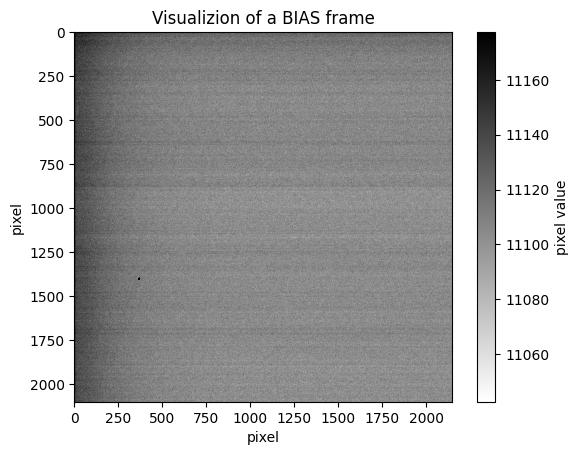

In [71]:
image_data=fits.getdata('ALEh040082.fits')

plt.title('Visualizion of a BIAS frame')
bias_visualization = plt.imshow(image_data, vmin=np.median(image_data[500:600,500:600])-2*np.std(image_data[500:600,500:600]), 
           vmax =np.median(image_data[500:600,500:600])+2*np.std(image_data[500:600,500:600]), cmap='binary')
plt.xlabel('pixel')
plt.ylabel('pixel')

##Addition of colorbar:
cb=plt.colorbar(bias_visualization)
cb.set_label('pixel value', fontsize =10, rotation =90, va='top')
plt.show()

### BIAS frame's image statistics:

Extract useful info for each BIAS frame. Caution! The pixels near the frame's borders should not be included in the calculations. They may refer to overscan regions, and this is why we calculate the image statistics in a smaller region, centrally located.

In [15]:
bias_list=[]
gain=[]
std=[]

for i in bias_frames:
    hdul = fits.open(i)
    data = hdul[1].data
    gain_value = hdul[1].header['GAIN']             
    bias_mean = np.mean(data[50:2050,50:2100])      # I chose to exclude the first ~50 first and last pixels
    bias_median = np.median(data[50:2050,50:2100])  # that could represent overscan regions and could thus
    bias_std = np.std(data[50:2050,50:2100])        # mess the statistics calculations
    bias_min = np.min(data[50:2050,50:2100])  
    bias_max = np.max(data[50:2050,50:2100])
    bias_list.append(data)
    gain.append(gain_value)                         # Creation of a list of gain values for every bias frame
    std.append(bias_std)
    
    ##Print each frame's OBJECT type from the header to make sure it is indeed a BIAS image.
    ##Also, print the image statistics:
    
    print('{0:30}{1:^10}{2:^30}{3:^8}'.format(colored('FILENAME','red'), 'x-axis','y-axis', 'Object'))
    print('{0:15} {1:^20.2e} {2:^18.2e} {3:^18}'.format(hdul[0].header['FILENAME'], hdul[1].header['NAXIS1'],
          hdul[1].header['NAXIS2'], hdul[0].header['OBJECT']))
    print(Back.BLUE+'FRAME STATISTICS:', Style.RESET_ALL)
    print('{0:15}{1:^20}{2:^20}{3:^20}{4:^20}'.format('mean pixel value', 'median value','stddev', 'min value', 'max value'))
    print('{0:7.2e} {1:^30.2e} {2:^15.2e} {3:^18.2e}{4:^22.2e}'.format(bias_mean, bias_median,bias_std, bias_min, bias_max))
    print('')
    hdul.close()

FILENAME               x-axis              y-axis             Object 
ALEh040053.fits       2.15e+03            2.10e+03             bias       
FRAME STATISTICS: 
mean pixel value    median value           stddev            min value           max value      
1.11e+04            1.11e+04               3.68e+01          1.09e+04            2.61e+04       

FILENAME               x-axis              y-axis             Object 
ALEh040018.fits       2.15e+03            2.10e+03             bias       
FRAME STATISTICS: 
mean pixel value    median value           stddev            min value           max value      
1.11e+04            1.11e+04               3.43e+01          1.09e+04            1.13e+04       

FILENAME               x-axis              y-axis             Object 
ALEh040029.fits       2.15e+03            2.10e+03             bias       
FRAME STATISTICS: 
mean pixel value    median value           stddev            min value           max value      
1.11e+04            1

### BIAS list shape:

With the above code chunk we have created a list that contains all the 100 individual frames. The list is transformed to an array, where we can inspect its shape:

In [16]:
bias_alldata = np.array(bias_list)
print('There are',bias_alldata.shape[0], 'bias frames of dimensions', bias_alldata.shape[1],'x',bias_alldata.shape[2])

There are 100 bias frames of dimensions 2102 x 2148


### Calculate the Read Out Noise (RON)

An estimation of the RON can already be made by searching in the filename[1].header, under the RDNOISE label. However this value is only based on a single frame and may be misleading. It is thus better to use the formula given below.

The RON can be determined as the standard deviation in the difference between two bias frames when certain
conditions are fulfilled, Because BIAS frames are relevant to the electronically added offset using the following
formula : 
#### RON = Gain * Std (bias1 - bias2) / sqrt(2)

In [18]:
bias_all = bias_alldata.astype('float64')  #change the data type from uint to float64 so that matrix calculations can correctly be performed

In [19]:
RON = []
for i in range(0,100):
    dif = bias_all[i-1, 1000:1200, 1000:1200] - bias_all[i,1000:1200, 1000:1200]
    stddev = np.std(dif)
    readout = gain[0]*stddev / np.sqrt(2)
    RON.append(readout)
print('The mean value of the Read Out Noise is', np.mean(RON), 'ADUs')

The mean value of the Read Out Noise is 5.887836105946102


### Image stacking for the creation of the master BIAS:

This can be done either by calculating the mean, or the median value of the images. The number of the bias frames used for the stacking can also vary.

In [39]:
def imstack(n_frames,method):
    masterbias = np.zeros(shape=bias_all[0].shape)
    for image in bias_all:
        if method == 'mean':
            masterbias += np.abs(image- np.median(image))
        elif method == 'median':
            masterbias += np.abs(image- np.median(image))
    return masterbias/n_frames

In [40]:
master_med10 = imstack(10,'median')
master_med100 = imstack(100,'median')

print('Imstack of 10 frames with the median method creates a masterbias with standard deviation',
      np.std(master_med10[50:2050,50:2100]))

print('while imstack of 100 frames with the median method creates a masterbias with standard deviation',
      np.std(master_med100[50:2050,50:2100]))

Imstack of 10 frames with the median method creates a masterbias with standard deviation 32.29578482147685
while imstack of 100 frames with the median method creates a masterbias with standard deviation 3.2295784821476836


This is to demonstrate that the n_frames choice changes significantly the value of the standard deviation. Typically, std is inversely proportional to the square root of the n_frames. As a rule of thumb, stacking 50-100 bias frames can provide a reliable masterbias. 

<Figure size 640x480 with 0 Axes>

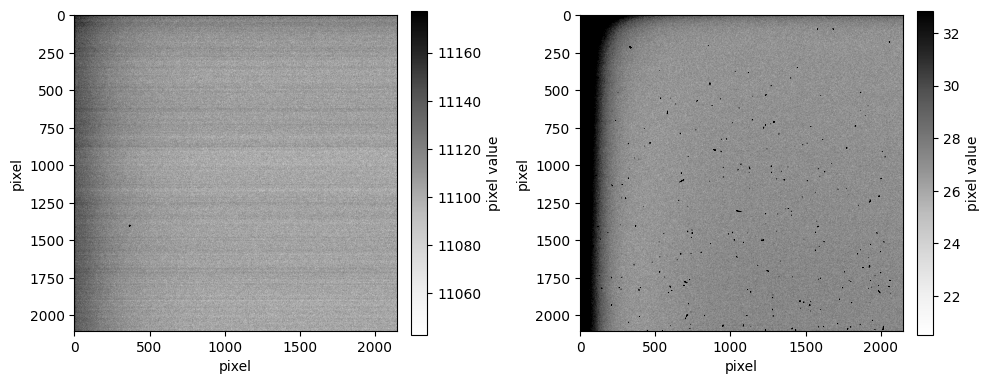

In [66]:
plt.suptitle('Comparison of a single BIAS to the masterbias')
plt.figure(figsize=(10,9))
plt.subplot(1, 2, 1)
single_bias = plt.imshow(image_data, vmin=np.median(image_data[500:600,500:600])-2*np.std(image_data[500:600,500:600]), 
           vmax =np.median(image_data[500:600,500:600])+2*np.std(image_data[500:600,500:600]),cmap='Greys')
plt.xlabel('pixel')
plt.ylabel('pixel')
cb1=plt.colorbar(single_bias,fraction=0.046, pad=0.04)
cb1.set_label('pixel value', fontsize =10, rotation =90, va='top')

plt.subplot(1, 2, 2)
master_bias = plt.imshow(master_med100, cmap='Greys',vmin=np.median(master_med100[500:600,500:600])-2*np.std(master_med100[500:600,500:600]), 
           vmax =np.median(master_med100[500:600,500:600])+2*np.std(master_med100[500:600,500:600]))
plt.xlabel('pixel')
plt.ylabel('pixel')
cb2=plt.colorbar(master_bias,fraction=0.046, pad=0.04)
cb2.set_label('pixel value', fontsize =10, rotation =90, va='top')
plt.tight_layout()
plt.show()

Similarly, one can combine the mean of all the BIAS frames to create the masterbias_mean

### Write the masterbias data to a fits file:

Now that the masterbias is created, we need to save its data as a fits image. The [0].header is copied from a random single bias frame. 
However the header can be edited and comments can be added, as shown in the chunk of code that follows:

In [44]:
hdu = fits.ImageHDU(master_med100)
hdr = getheader('./ALEh040035.fits',0)
hdr['COMMENT'] = "= 'MasterBias created by the median stacking of the rawbias frames'"
empty_primary = fits.PrimaryHDU(header=hdr)
hdul = fits.HDUList([empty_primary, hdu])
name = 'masterbias.fits'
hdul.writeto(name, overwrite=True)

In [67]:
master= fits.open('masterbias.fits')